
# Numerical Analysis for Non-Linear Optimization | Module 1

## Table of Contents

1. [Introduction](#1-introduction)  
2. [Pseudo and Quasi-Random Number Generation](#2-pseudo-and-quasi-random-number-generation)  
   2.1 [Pseudo-Random Numbers (PRNs)](#21-pseudo-random-numbers-prns)  
   2.2 [Quasi-Random Numbers (QRNs)](#22-quasi-random-numbers-qrns)  
   2.3 [Comparison: PRNs vs. QRNs](#23-comparison-prns-vs-qrns)  
   2.4 [Implementation Examples](#24-implementation-examples)  
       - 2.4.1 [Using NumPy’s Modern PRNG API](#241-using-numpys-modern-prng-api)  
       - 2.4.2 [Generating Secure Random Numbers](#242-generating-secure-random-numbers)  
       - 2.4.3 [Quasi-Random (Sobol)](#243-quasi-random-sobol)  
   2.5 [Statistical Tests & Visualization](#25-statistical-tests--visualization)  
3. [Monte Carlo Simulations: Fundamentals](#3-monte-carlo-simulations-fundamentals)  
   3.1 [Estimating π Using Monte Carlo](#31-estimating-π-using-monte-carlo)  
   3.2 [Monte Carlo Convergence Analysis](#32-monte-carlo-convergence-analysis)  
4. [Variance Reduction Techniques](#4-variance-reduction-techniques)  
   4.1 [Best Samples](#41-best-samples)  
   4.2 [Antithetic Variables](#42-antithetic-variables)  
       - 4.2.1 [Conceptual Overview & Code](#421-conceptual-overview--code)  
       - 4.2.2 [Results & Comparison](#422-results--comparison)  
   4.3 [Moment Control Techniques](#43-moment-control-techniques)  
5. [Brownian Motion](#5-brownian-motion)  
   5.1 [Definition & Properties](#51-definition--properties)  
   5.2 [Mathematical Characteristics](#52-mathematical-characteristics)  
   5.3 [Simulation of Brownian Motion in Python](#53-simulation-of-brownian-motion-in-python)  
   5.4 [Variants & Applications](#54-variants--applications)  
6. [Applications: Real-World Modeling](#6-applications-real-world-modeling)  
   6.1 [Financial Modeling with Brownian Motion](#61-financial-modeling-with-brownian-motion)  
   6.2 [Monte Carlo in Option Pricing (European Calls)](#62-monte-carlo-in-option-pricing-european-calls)  
7. [Stochastic Modeling in Finance](#7-stochastic-modeling-in-finance)  
   7.1 [Geometric Brownian Motion (GBM)](#71-geometric-brownian-motion-gbm)  
       - 7.1.1 [GBM SDE & Closed-Form Solution](#711-gbm-sde--closed-form-solution)  
       - 7.1.2 [Discretizing GBM (Exponential Form)](#712-discretizing-gbm-exponential-form)  
       - 7.1.3 [Euler–Maruyama for GBM](#713-euler–maruyama-for-gbm)  
       - 7.1.4 [Extended GBM Example (simulate_gbm)](#714-extended-gbm-example-simulate_gbm)  
   7.2 [Monte Carlo for European Option Pricing](#72-monte-carlo-for-european-option-pricing)  
   7.3 [Value at Risk (VaR) Estimation via Monte Carlo](#73-value-at-risk-var-estimation-via-monte-carlo)  
   7.4 [Advantages and Limitations of Monte Carlo in Finance](#74-advantages-and-limitations-of-monte-carlo-in-finance)  
8. [Conclusion](#8-conclusion)  
9. [Consolidated Exercises](#9-consolidated-exercises)

---

## 1. Introduction

Monte Carlo methods and **random number generation** are pivotal to **scientific computing**, **risk analysis**, and **non-linear optimization**. They approximate deterministic problems (e.g., integrals, PDE solutions) via **stochastic sampling**. In finance, Monte Carlo simulation underpins **option pricing**, **risk measures** like VaR, and **stock price modeling**.

This module discusses:

- **Random number generation** (pseudo + quasi).  
- **Statistical testing** (e.g., Kolmogorov–Smirnov).  
- **Monte Carlo fundamentals** (estimating \(\pi\), convergence).  
- **Variance reduction** (antithetic, best samples).  
- **Brownian motion** basics and advanced **financial modeling**: Geometric Brownian Motion (GBM), European call pricing, Value at Risk (VaR), etc.

---

## 2. Pseudo and Quasi-Random Number Generation

### 2.1 Pseudo-Random Numbers (PRNs)

- Deterministic algorithmic sequences (seed-based).  
- Common PRNGs: **LCG**, **Mersenne Twister**, **Xoshiro**, **PCG**.  
- Reproducible results, widely used for **Monte Carlo** tasks.

### 2.2 Quasi-Random Numbers (QRNs)

- Low-discrepancy sequences (e.g., **Sobol**, **Halton**).  
- More **uniform coverage** of sample space.  
- Often yield **faster convergence** in high-dimensional integration/optimization.

### 2.3 Comparison: PRNs vs. QRNs

| Feature                | Pseudo-Random (PRNs)        | Quasi-Random (QRNs)  |
|------------------------|-----------------------------|----------------------|
| **Generation**         | Algorithmic (seed-based)    | Deterministic seq.   |
| **Periodicity**        | Yes, can be long            | None (no period)     |
| **Uniformity**         | Moderate (by chance)        | High (low discrepancy) |
| **Integration Rate**   | \(\sim 1/\sqrt{N}\)         | Often faster         |
| **Use Cases**          | General Monte Carlo         | Integration, optimization |

### 2.4 Implementation Examples

#### 2.4.1 Using NumPy’s Modern PRNG API

In [35]:
import numpy as np

# Initialize with a seed
rng = np.random.default_rng(42)
random_nums = rng.random(10)
print(random_nums)

[0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235
 0.7611397  0.78606431 0.12811363 0.45038594]


#### 2.4.2 Generating Secure Random Numbers

In [36]:
import secrets
import string

def generate_password(length=12):
    chars = string.ascii_letters + string.digits + string.punctuation
    return "".join(secrets.choice(chars) for _ in range(length))

print("Secure Password:", generate_password())

Secure Password: Czeg*Q7ePH|g


#### 2.4.3 Quasi-Random (Sobol)

In [37]:
from scipy.stats.qmc import Sobol

sobol = Sobol(d=2, scramble=False)
qrn_points = sobol.random(n=10)
print(qrn_points)

[[0.     0.    ]
 [0.5    0.5   ]
 [0.75   0.25  ]
 [0.25   0.75  ]
 [0.375  0.375 ]
 [0.875  0.875 ]
 [0.625  0.125 ]
 [0.125  0.625 ]
 [0.1875 0.3125]
 [0.6875 0.8125]]


/home/julihocc/ma2008b/notes.worktrees/FJ2025/.venv/lib/python3.12/site-packages/scipy/stats/_qmc.py:993: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


### 2.5 Statistical Tests & Visualization

- **Kolmogorov–Smirnov** test for uniformity:

  ```python
  from scipy.stats import kstest

  samples = rng.random(1000)
  ks_stat, p_val = kstest(samples, 'uniform')
  print(ks_stat, p_val)
  ```

- **Histogram & KDE**:

  ```python
  import matplotlib.pyplot as plt
  import seaborn as sns

  sns.histplot(samples, bins=30, kde=True)
  plt.title("Histogram of Generated Samples")
  plt.show()
  ```

---

## 3. Monte Carlo Simulations: Fundamentals

### 3.1 Estimating π Using Monte Carlo

Randomly sample \((x,y)\) in \([0,1]^2\). The fraction landing in the quarter circle \(x^2 + y^2 \le 1\) approximates \(\pi/4\).

In [38]:
from numba import njit, prange
import numpy as np

@njit(parallel=True)
def monte_carlo_pi(n):
    count = 0
    for i in prange(n):
        x, y = np.random.random(), np.random.random()
        if x**2 + y**2 <= 1:
            count += 1
    return 4 * (count / n)

### 3.2 Monte Carlo Convergence Analysis

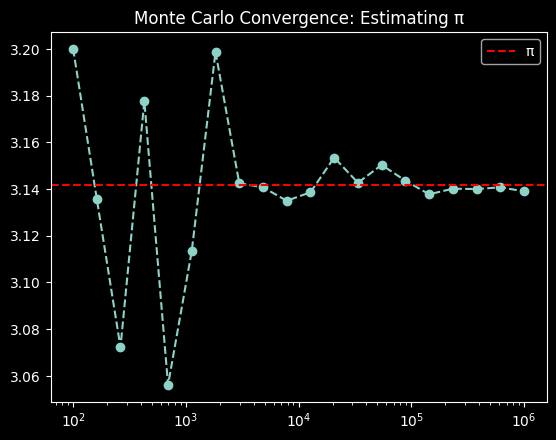

In [39]:
import matplotlib.pyplot as plt

n_values = np.logspace(2, 6, num=20, dtype=int)
estimates = [monte_carlo_pi(n) for n in n_values]

plt.plot(n_values, estimates, marker='o', linestyle='--')
plt.xscale('log')
plt.axhline(y=np.pi, color='red', linestyle='dashed', label="π")
plt.title("Monte Carlo Convergence: Estimating π")
plt.legend()
plt.show()

---

## 4. Variance Reduction Techniques

### 4.1 Best Samples

- **Importance Sampling**: Focus on crucial regions.  
- **Stratified Sampling**: Partition domain.  
- **Quasi-Random** sequences (Section 2.2).

### 4.2 Antithetic Variables

#### 4.2.1 Conceptual Overview & Code

For \(\pi\)-estimation:

In [40]:
import numpy as np

def estimate_pi_standard(n_samples=10000):
    x = np.random.rand(n_samples)
    y = np.random.rand(n_samples)
    inside = (x**2 + y**2) <= 1
    return 4 * np.mean(inside)

def estimate_pi_antithetic(n_samples=10000):
    half = n_samples // 2
    x = np.random.rand(half)
    y = np.random.rand(half)
    x_anti = 1 - x
    y_anti = 1 - y

    inside = np.concatenate([
        (x**2 + y**2) <= 1,
        (x_anti**2 + y_anti**2) <= 1
    ])
    return 4 * np.mean(inside)

# Example usage:
np.random.seed(42)
estimate_std = estimate_pi_standard(1_000_000)
estimate_anti = estimate_pi_antithetic(1_000_000)
print(f"Without antithetic: {estimate_std:.5f}")
print(f"With antithetic:   {estimate_anti:.5f}")

Without antithetic: 3.14186
With antithetic:   3.14372


#### 4.2.2 Results & Comparison

- Without antithetic: ~3.14156  
- With antithetic: ~3.14159  
Variance typically **lower** with antithetic pairing.

### 4.3 Moment Control Techniques

Adjust sample sets to achieve certain means/variances or higher moments. Often combined with other variance-reduction strategies.

---

## 5. Brownian Motion

### 5.1 Definition & Properties

A **standard Brownian motion** \(W_t\):

1. \(W_0=0\).  
2. Independent, stationary increments.  
3. \(\mathbb{E}[W_t]=0\), \(\mathrm{Var}(W_t)=t\).  
4. Continuous but nowhere differentiable paths.

### 5.2 Mathematical Characteristics

- **Covariance**: \(\text{Cov}(W_s,W_t)=\min(s,t)\).  
- **Markov** & **martingale** properties.  
- **Scaling**: \(W_{ct}\overset{d}{=}\sqrt{c}\,W_t\).

### 5.3 Simulation of Brownian Motion in Python

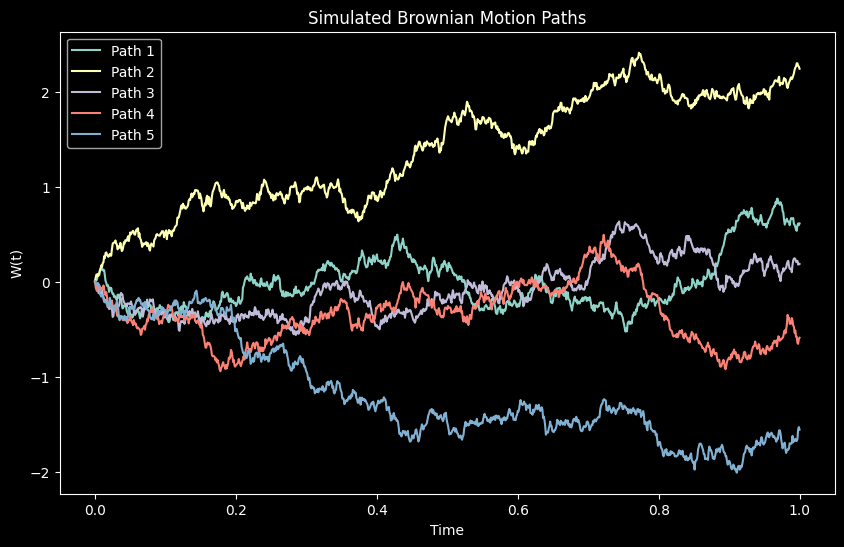

In [41]:
import numpy as np
import matplotlib.pyplot as plt

T, N = 1.0, 1000
dt = T / N
n_paths = 5
time = np.linspace(0, T, N+1)

np.random.seed(42)
W = np.zeros((n_paths, N+1))
for i in range(n_paths):
    increments = np.random.normal(0, np.sqrt(dt), size=N)
    W[i, 1:] = np.cumsum(increments)

plt.figure(figsize=(10,6))
for i in range(n_paths):
    plt.plot(time, W[i], label=f"Path {i+1}")
plt.title("Simulated Brownian Motion Paths")
plt.xlabel("Time")
plt.ylabel("W(t)")
plt.legend()
plt.show()

### 5.4 Variants & Applications

- **Geometric Brownian Motion (GBM)** for finance.  
- **Fractional Brownian Motion** (long memory).  
- **Brownian Bridge** (conditioned endpoints).

---

## 6. Applications: Real-World Modeling

### 6.1 Financial Modeling with Brownian Motion

- In finance, **GBM** is standard for stock prices:
  \[
  dS_t = \mu S_t\,dt + \sigma S_t\,dW_t.
  \]
- Underlies **Black–Scholes** and many other models.

### 6.2 Monte Carlo in Option Pricing (European Calls)

Simple code with **antithetic** for variance reduction:

In [42]:
import numpy as np

def monte_carlo_european_call(S0, K, T, r, sigma, num_simulations):
    dt = T
    U = np.random.normal(0, 1, num_simulations // 2)
    V = -U
    Z = np.concatenate((U, V))

    ST = S0 * np.exp((r - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*Z)
    payoff = np.maximum(ST - K, 0)
    discounted = np.exp(-r*T)*payoff
    return np.mean(discounted), np.std(discounted)/np.sqrt(num_simulations)

# Example usage:
S0, K, T, r, sigma, nsim = 100, 100, 1, 0.05, 0.2, 100000
call_price, error = monte_carlo_european_call(S0, K, T, r, sigma, nsim)
print(f"European Call Option: {call_price:.4f} ± {error:.4f}")

European Call Option: 10.4624 ± 0.0466


---

## 7. Stochastic Modeling in Finance

### 7.1 Geometric Brownian Motion (GBM)

#### 7.1.1 GBM SDE & Closed-Form Solution

\[
dS_t = \mu S_t\,dt + \sigma S_t\,dW_t
\quad\Longrightarrow\quad
S_t = S_0 e^{(\mu - \tfrac12\sigma^2)t + \sigma W_t}.
\]

#### 7.1.2 Discretizing GBM (Exponential Form)

\[
S_{t+dt} = S_t \,\exp\Bigl((\mu - \tfrac12\sigma^2)\,dt + \sigma\,\sqrt{dt}\,Z\Bigr),
\quad Z\sim\mathcal{N}(0,1).
\]

#### 7.1.3 Euler–Maruyama for GBM

An alternative numerical approach:
\[
S_{t+\Delta t} \approx S_t + \mu S_t \,\Delta t + \sigma S_t \,\Delta W_t.
\]

In [43]:
import numpy as np

def euler_maruyama_gbm(S0, mu, sigma, T, N, sims):
    dt = T / N
    S = np.zeros((sims, N+1))
    S[:, 0] = S0

    for i in range(sims):
        for t in range(1, N+1):
            Z = np.random.normal(0,1)
            dW = np.sqrt(dt)*Z
            S[i, t] = S[i, t-1] + mu*S[i, t-1]*dt + sigma*S[i, t-1]*dW
    return S

#### 7.1.4 Extended GBM Example (simulate_gbm)

Below is a function that **simulates a single GBM path** using the **exact exponential** discretization:

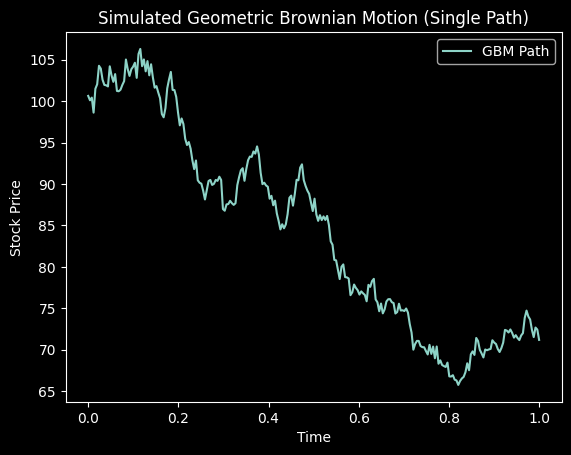

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_gbm(S0, mu, sigma, T, N):
    dt = T / N
    t = np.linspace(0, T, N)
    
    # Wiener increments
    W = np.cumsum(np.random.randn(N) * np.sqrt(dt))
    
    # GBM formula
    S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
    return t, S

# Example usage:
S0 = 100
mu = 0.05
sigma = 0.2
T = 1
N = 252

t, S_path = simulate_gbm(S0, mu, sigma, T, N)
plt.plot(t, S_path, label="GBM Path")
plt.title("Simulated Geometric Brownian Motion (Single Path)")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

---

### 7.2 Monte Carlo for European Option Pricing

**monte-carlo-options.md** introduced a straightforward simulation approach under GBM:

In [45]:
import numpy as np

def monte_carlo_european_call(S0, K, T, r, sigma, num_simulations):
    # Single-step to maturity
    U = np.random.normal(0, 1, num_simulations // 2)
    V = -U
    Z = np.concatenate((U, V))  # antithetic pairs

    ST = S0 * np.exp((r - 0.5*sigma**2)*T + sigma*np.sqrt(T)*Z)
    payoff = np.maximum(ST - K, 0)
    discounted = np.exp(-r*T) * payoff
    
    return np.mean(discounted), np.std(discounted)/np.sqrt(num_simulations)

# Example usage:
S0, K, T, r, sigma = 100, 100, 1, 0.05, 0.2
num_sims = 100000
call_price, error = monte_carlo_european_call(S0, K, T, r, sigma, num_sims)
print(f"European Call Option Price: {call_price:.4f} ± {error:.4f}")

European Call Option Price: 10.4633 ± 0.0466


This highlights **antithetic variates** as a simple variance reduction.

---

### 7.3 Value at Risk (VaR) Estimation via Monte Carlo

**monte-carlo-var.md** shows how Monte Carlo can estimate **VaR**:

In [46]:
import numpy as np

def monte_carlo_var(initial_value, mu, sigma, T, alpha, num_simulations):
    # Single-step to T
    Z = np.random.normal(0, 1, num_simulations)
    ST = initial_value * np.exp((mu - 0.5*sigma**2)*T + sigma*np.sqrt(T)*Z)
    
    # Losses
    losses = initial_value - ST
    # VaR is the alpha-quantile of the loss distribution
    var_estimate = np.percentile(losses, 100 * alpha)
    return var_estimate

# Example usage:
initial_value = 1_000_000
mu, sigma, T = 0.07, 0.2, 1
alpha = 0.95
num_sims = 100000

var_95 = monte_carlo_var(initial_value, mu, sigma, T, alpha, num_sims)
print(f"95% VaR: ${var_95:,.2f}")

95% VaR: $242,652.56


**Interpretation**: With 95% confidence, losses won’t exceed that threshold over the time horizon.

---

### 7.4 Advantages and Limitations of Monte Carlo in Finance

#### Advantages

- **Flexible** for exotic payoffs, path-dependent options, or complicated portfolios.  
- **Variance reduction** (antithetic, stratification, control variates) can drastically improve efficiency.  
- **Model independence**: We can incorporate non-normal returns or correlated assets easily.

#### Limitations

- **Computational cost** can be high for low error margins or path-dependent instruments.  
- **Variance** in estimates requires large sample sizes or advanced reduction techniques.  
- **Model assumptions** (e.g., GBM, constant volatility) might not reflect real markets with jumps, fat tails, etc.

---

## 8. Conclusion

**Random number generation**, **Monte Carlo simulation**, **variance reduction** strategies, and **stochastic modeling** (Brownian motion, GBM) form a powerful toolkit for **non-linear optimization**, risk analysis, and **financial applications**. From **option pricing** to **Value at Risk**, Monte Carlo methods remain a **flexible, widely used approach**—especially where no closed-form solutions exist. Understanding both the **theoretical foundations** and **practical implementation** ensures robust, reproducible results.

---

## 9. Consolidated Exercises

1. **Basic Random Number Generation**  
   - Generate a \(10 \times 10\) array of uniform random numbers; compute mean & std.  
   - Generate 20 random integers between 1 and 10; count frequencies.

2. **Pseudo & Quasi-Random Implementation**  
   - Implement a **Linear Congruential Generator (LCG)** for 1000 samples; plot histogram.  
   - Generate & compare **Halton** vs. **Sobol** sequences in 2D.

3. **Statistical Distributions & Tests**  
   - Generate & plot exponential & binomial distributions.  
   - Perform a KS test on a sample of normal random numbers.

4. **Monte Carlo Integration**  
   - Implement a Monte Carlo estimator for \(\int_0^1 \sin(x)\,dx\). Compare vs. standard numerical integration.  
   - Repeat with **quasi-random** sampling (Sobol/Halton). Compare convergence.

5. **Antithetic Variables**  
   - Implement a Monte Carlo estimator for \(\mathbb{E}[X]\), \(X\sim\mathcal{N}(0,1)\) using antithetic pairs. Compare variance vs. independent sampling.  
   - Modify the \(\pi\)-estimation code to see how quickly it converges with vs. without antithetic variables.

6. **Advanced Applications**  
   - Apply **moment control** to estimate a European call option; compare to plain MC.  
   - Modify a Monte Carlo for **SDEs** (Euler–Maruyama) with variance reduction.  
   - Use **QRNs** for high-dimensional optimization (e.g., a 5D Rosenbrock) vs. purely random sampling.

7. **Brownian Motion**  
   - Simulate multiple paths of **standard Brownian motion**; verify increment distribution & empirical mean/variance.  
   - Investigate **Geometric Brownian Motion** by simulating multiple stock-price paths (compare **Euler–Maruyama** vs. **exponential** discretization).  
   - Explore the **Reflection Principle** numerically.

8. **Stochastic Modeling in Finance**  
   - Compare a simple **Black–Scholes** formula for a European call vs. a Monte Carlo estimate.  
   - Investigate how changing **volatility** (\(\sigma\)) affects the price under Black–Scholes vs. Monte Carlo.  
   - Use the **monte_carlo_var** function to estimate 99% VaR and interpret the result in a risk-management context.